In [ ]:
pip install --upgrade gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 10.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827725 sha256=97fa05fb4ec642d31581734bf8fa93a99a52dcdfdccd358296018fe7780736b2
  Stored in directory: /root/.cache/pip/wheels/1c/77/9e/9af5470201a0b0543937933ee99ba884cd237d2faefe8f4d37
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
! pip install pygame

In [ ]:
import numpy as np
import gym # Gym gives you virtual worlds like games or puzzles. It is used to create and run environments for training AI agents
import matplotlib.pyplot as plt

In [ ]:
env = gym.make('Taxi-v3') # Creating a virtual taxi game environment

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
from IPython import display
from pyvirtualdisplay import Display
from matplotlib import animation

d = Display()
d.start()

Episode: 9
Score: -695


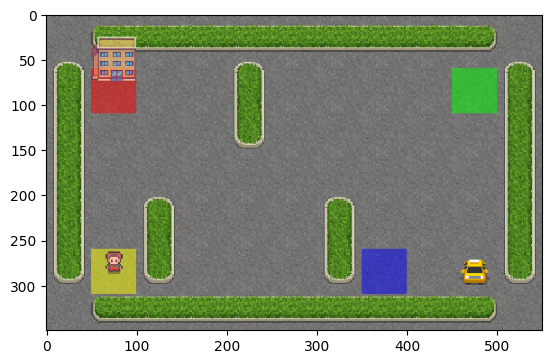

In [ ]:
episodes = 10

for episode in range(1, episodes):
  state = env.reset()
  done = False
  score = 0
  prev_screen = env.render(mode='rgb_array')
  plt.imshow(prev_screen)
  img = []
  while not done:
    next_state, reward, done, info = env.step(env.action_space.sample())
    score += reward
    display.clear_output(wait=True)
    img.append(env.render('rgb_array'))
  print('Episode: {}\nScore: {}'.format(episode, score))

In [ ]:
actions = env.action_space.n              # number of possible actions the agent can take
state = env.observation_space.n           # number of possible states the environment can be in

q_table = np.zeros((state, actions))

In [ ]:
num_episodes = 10000
max_steps_per_episode = 100
learning_rate = .1                  # update the memory
discount_rate = 0.99                # It helps the AI make smart, future-focused decisions, not just chase fast points
exploration_rate = 1                # will make random moves at the beginning
max_exploration_rate = 1            # starting value for how random the AI should be
min_exploration_rate = 0.01         # Even after learning, it will still try something new once in a while
exploration_decay_rate = 0.001      # makes sure this change happens gradually — the AI becomes less random and more smart as it practices

rewards_all_episodes = []

In [ ]:
for episode in range(num_episodes):
  state = env.reset()
  done = False
  rewards_cur_episode = 0

  for step in range(max_steps_per_episode):

    #Exploration Vs Exploitation trade-off
    exploration_threshold = np.random.uniform(0, 1)

    # If the random number is greater than the exploration rate:
    # Agent chooses the best known action (the one with the highest Q-value from the Q-table) — this is exploitation.
    # Otherwise, the agent picks a random action — this is exploration.
    if exploration_threshold > exploration_rate:
      action = np.argmax(q_table[state,:])
    else:
      action = env.action_space.sample()

    next_state, reward, done, info = env.step(action)

    # This is the Q-learning formula. It updates the Q-value for the current state and action based on:
    # How good was the reward
    # How good are the next possible actions (np.max(q_table[next_state, :]))
    # So the agent learns from the result of its action.
    q_table[state, action] = q_table[state, action]*(1-learning_rate) + learning_rate*(reward + discount_rate*np.max(q_table[next_state, :]))

    state = next_state
    rewards_cur_episode += reward

    if done == True:
      break

  #A mathemalical equation to decay the exploration rate over time so we start take action from our Q-Table instead of taking random action
  # This line below reduces the exploration rate as we train more. At the beginning, the agent explores a lot, but over time, it trusts its Q-table more and picks the best-known actions.
  exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

  rewards_all_episodes.append(rewards_cur_episode)

print("*******Training Finished*******")

*******Training Finished*******


In [ ]:
q_table

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.46644789,  1.74283046,  0.44434476,  0.9692901 ,  9.6220697 ,
        -8.93506159],
       [ 6.2746547 ,  1.21907611,  1.61774334,  7.13563257, 14.11880599,
        -1.36007173],
       ...,
       [ 2.38823011, 15.2715212 ,  3.33879798,  3.80695245,  0.7154975 ,
        -2.08790085],
       [-2.96158789, -1.75219728, -2.91060605, -2.9875    , -9.37456059,
        -8.86954907],
       [-0.50910049,  0.37448484,  0.85099653, 16.76702888, -2.58015972,
        -3.382492  ]])

In [ ]:
rewards_per_1000_episodes = np.split(np.array(rewards_all_episodes), num_episodes/1000)
cnt = 1000

print("Average per thousand episodes")
for r in rewards_per_1000_episodes:
  print(cnt, ": ", str(sum(r/1000)))
  cnt += 1000

Average per thousand episodes
1000 :  -254.43099999999976
2000 :  -39.01699999999997
3000 :  1.9419999999999948
4000 :  5.914999999999977
5000 :  6.802999999999973
6000 :  7.167999999999967
7000 :  7.406999999999969
8000 :  7.485999999999963
9000 :  7.408999999999971
10000 :  7.484999999999965


step:  13  reward:  20
******Reached Goal******


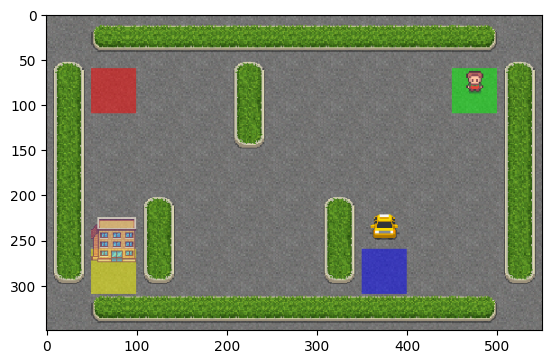

In [ ]:
for episode in range(30):
  state = env.reset()
  done = False
  print("Episode: ", episode)

  prev_screen = env.render(mode='rgb_array')
  plt.imshow(prev_screen)
  img = []
  for step in range(max_steps_per_episode):
    action = np.argmax(q_table[state, :])

    next_state, reward, done, info = env.step(action)

    display.clear_output(wait=True)
    img.append(env.render('rgb_array'))

    print("step: ", step, " reward: ", reward)


    if done:
      if reward == 20:
        print("******Reached Goal******")
      else:
        print("******Failed******")
      img.append(env.render('rgb_array'))

      break
    state = next_state

env.close()

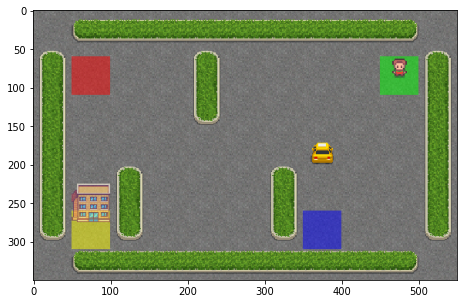

In [ ]:
dpi = 72
interval = 200

plt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)
display.display(display.HTML(ani.to_jshtml()))